# Multiple Layer Of Neural Network
## with global gradient descent

In this chapter, I will introduce my own implementation of Multiple Layer of Neural Network with a dumb, simple and quick way.

First, let's prepare the data.

In [26]:
import numpy as np
import copy

X = np.array([
    [0,0,1],
    [0,1,1],
    [1,0,1],
    [1,1,1]
])
y =  np.array([
    [1],
    [0],
    [0],
    [0]
])

The idea is: for the input values, if number of zero is more than number of one, it will return one, else, it will return zero.

Following is a simple method to build the weights matrix. Let's build a two layer network

In [27]:
def designWeights(input_n, output_n):
    return 2 * np.random.random((output_n, input_n + 1)) -1 #attach the bias input

In [28]:
weights = np.array([
    designWeights(3,3),
    designWeights(3,1)
])

In [29]:
m, n = X.shape

In [30]:
def sigmoid(X):
    return 1/(1+np.exp(-X))
def h_per_layer(X,weights, layer_index):
    X_ = np.c_[np.ones((m,1)), X]
    return np.array([sigmoid(X_.dot(weights_per_layer)) for weights_per_layer in weights[layer_index]]).T
def h(X,weights):
    layer_n = weights.shape[0]
    for layer_index in range(layer_n):
        X = h_per_layer(X, weights, layer_index)
    return X

In [31]:
def cost(y_, y):
    return np.square(y_ - y).sum()

In [32]:
def derivation(X, weights, layer_index, weight_output_index, weight_unit_index, original_value):
    small_diff = 0.001
    weights_new = copy.deepcopy(weights)
    weights_new[layer_index][weight_output_index][weight_unit_index]=weights_new[layer_index][weight_output_index][weight_unit_index] + small_diff
    y_=  h(X, weights_new)
    return (cost(y_, y) -  original_value)/small_diff

In [33]:
def gradient_descent(X, y, weights):
    layer_n =weights.shape[0]
    retWeights = copy.deepcopy(weights)
    original_cost = cost(h(X, retWeights), y)
    learning_rate = 1
    for layer_index in range(layer_n):
        for output_index, weights_unit  in enumerate(retWeights[layer_index]):
            for unit_index, weights_output in enumerate(weights_unit):
                diff = derivation(X,weights, layer_index, output_index, unit_index, original_cost)
                retWeights[layer_index][output_index][unit_index]=retWeights[layer_index][output_index][unit_index] - learning_rate * diff
            
    return retWeights, original_cost

In [34]:
cost_history=[]
for i in range(1000):
    weights, cost_value = gradient_descent(X, y, weights)
    cost_history.append(cost_value)

In [35]:
h(X,weights)

array([[ 0.97970297],
       [ 0.01372732],
       [ 0.01389405],
       [ 0.00241994]])

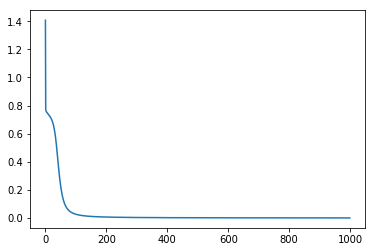

In [36]:
import matplotlib.pyplot as plt
plt.plot(cost_history)
plt.show()